<h1 align="center">UNIVERSIDADE ESTADUAL DE CAMPINAS</h1> 

<h1 align="center">INSTITUTE OF COMPUTING</h1> 

<h2 align="center">Machine Learninng</h2> 
<h2 align="center">MC886A/MO444A</h2> 


- Luis Bernal Chahuayo (RA 234923)
- Jarol Butron Soria (RA 234833)

# 1. Introduction
<p>Clustering allows us to be able to group a set of objects into subsets of objects called clusters, each cluster is made up of a collection of objects that are similar to each other, but that are different from the objects of other clusters. It can be used for the diagnosis of diseases through images, in the monitoring of social networks, marketing. Clustering is part of unsupervised learning, there are some clustering methods such as k-means, hierarchical clustering, K-medoids, DBSCAN, Hierarchical Clustering, etc.</p>

# 2. Clustering Methods
## 2.1 K-Means
The K-means algorithm is an iterative algorithm that attempts to divide the data set into K distinct non-overlapping predefined subgroups called clusters, where each data point belongs to a single group. Trying to make the intra-cluster data points as similar as possible while keeping the clusters as different as possible.

In [26]:

def kmeans(k,x,y):
    
    # Find min and max values    
    x_min=np.min(x)
    x_max=np.max(x)
    y_min=np.min(y)
    y_max=np.max(y)
   
    # Select K Random Points
    punto_x=np.random.uniform(low=x_min,high=x_max,size=k)
    punto_y=np.random.uniform(low=y_min,high=y_max,size=k)
    
    # Setting a huge distortion
    # Used to stop algorithm
    old_distortion = np.inf

    for it in range(20):
        # Create distance matrix
        matriz_distancias = np.zeros((len(x),k))
        for k_i in range(k):
            # Euclidean distance
            x_h=(x-punto_x[k_i])**2
            y_h=(y-punto_y[k_i])**2
            dist= np.sqrt(x_h+y_h)
            matriz_distancias[:,k_i]=dist

        # Find the minimum distance. Creation of mask matrix
        min=np.argmin(matriz_distancias,axis=1)
        matriz_clusters=np.zeros(matriz_distancias.shape)
        i=0
        for min_i in min:
            matriz_clusters[i][min_i]=1
            i+=1

        # Column matrix transformation
        x_r=x.reshape(-1,1)
        y_r=y.reshape(-1,1)

        # Sum of cluster values
        matriz_clusters_x=x_r*matriz_clusters
        matriz_clusters_y=y_r*matriz_clusters

        total=matriz_clusters.sum(axis=0)

        total_x=matriz_clusters_x.sum(axis=0)
        total_y=matriz_clusters_y.sum(axis=0)

        # Update point with mean total_x
        punto_x=(total_x/ (total+0.0000000001) )
        punto_y=(total_y/ (total+0.0000000001) )

        # Cluster list
        clusters = np.argmax(matriz_clusters,axis=1)
        centroides_x = np.matmul(matriz_clusters,punto_x)
        centroides_y = np.matmul(matriz_clusters,punto_y)
        
        distortion = Distortion(x,y,centroides_x,centroides_y)
        
        # Distortion - Condition
        if ( abs( old_distortion - distortion ) <= 0.001 ): 
            break
        else: old_distortion = distortion


    print ( "\n \n DISTORTION =",distortion, "Clusters=", k)
    plt.scatter(x,y,marker="o",c=clusters)
    plt.scatter(punto_x,punto_y,marker="*",c="red")
    plt.show()

    return punto_x,punto_y,matriz_clusters,distortion


## 2.2 DBSCAN

The Density-Based Noisy Applications Spatial Clustering Algorithm (DBSCAN) is an algorithm used for density-based clustering. Being able to discover groups of different shapes and sizes from a large amount of data that contains noise and outliers. The DBSCAN algorithm uses two parameters: the minimum number of points (threshold) grouped for a region to be considered dense, and an average distance that will be used to locate the points in the vicinity of any point.


In [27]:
def dbscan(x,y, radio, M ):
    marcas = np.zeros( x.shape )
   

    # Repeat until all points are visited
    while( True ):
        
        por_procesar = np.where( marcas == 0)
        if ( len ( por_procesar[0] ) == 0): break

        # Choose a point not visited 
        p_index = por_procesar[0][0] 
        punto_x = x[p_index]
        punto_y = y[p_index]

        # Get Distances 
        distancias = np.sqrt ( ( x - punto_x )**2 + ( y - punto_y )**2 )

        # Select points that are neighboors from the choose point

        n_vecinos = len ( distancias[ distancias < radio ]  )

        # Classify 
        # 0 No worked 
        # 1 Core Point
        # 2 Border
        # 3 Outlier

        if  n_vecinos >= M:
            marcas[p_index] = 1
        elif n_vecinos > 0 : 
            marcas[p_index] = 2
        else: 
            marcas[p_index] = 3
    
    # -1 : No cluster
    clusters = -1 * np.ones ( marcas.shape )

    visitados = np.zeros ( marcas.shape  , dtype=bool)
    
    
    core_points = np.where(marcas == 1)[0]
    n_cluster = 0

    # Repeat until all core points have been visited 
    while ( True ):
        if ( len(core_points) == 0 ) : break
        if  len(  np.where ( ( ~ visitados ) & ( clusters != -1  ) & ( marcas == 1 ) )[0]  ) == 0:
            
            #
            c_p_x = x[core_points[0]]
            c_p_y = y[core_points[0]]
            visitados[ core_points[0] ] = 1 
            distancias = np.sqrt ( ( x - c_p_x )**2 + ( y - c_p_y )**2 )
            clusters[ np.where(distancias < radio)  ] = n_cluster 
            core_points = core_points[ 1 : ]
            n_cluster += 1 
        else:
            # 
            core_points_nuevos = np.where ( ( ~ visitados ) & ( clusters != -1  ) & ( marcas == 1 ) )[0]      
            c_p_x = x[core_points_nuevos[0]]
            c_p_y = y[core_points_nuevos[0]]
            visitados[ core_points_nuevos[0] ] = 1 
            distancias = np.sqrt ( ( x - c_p_x )**2 + ( y - c_p_y )**2 )
            clusters[ np.where(distancias < radio)  ] = clusters[ core_points_nuevos[0] ]
            core_points = np.delete(core_points, np.where( core_points == core_points_nuevos[0] ))

    print("\n \nBorders and Core Points")
    plt.scatter(x,y,c=marcas)
    plt.show()
    
    ## Getting centroides 
    matrix_clusters = pd.get_dummies(clusters).to_numpy()
    
    sumas = matrix_clusters.sum(axis=0)

    x_matrix = x.reshape(-1,1)*matrix_clusters
    y_matrix = y.reshape(-1,1)*matrix_clusters

    x_centro = (x_matrix.sum(axis=0)/sumas)
    
    y_centro = (y_matrix.sum(axis=0)/sumas)
    
    # centroides_x = np.matmul(x_centro,matrix_clusters.T)
    # centroides_y = np.matmul(y_centro,matrix_clusters.T)
    
    

    # ( 1, 3 )  x ( 760  , 3  )
    

    print("Final Clusters formed")
    plt.scatter(x,y,c=clusters,s=3)
    plt.show()

    return x_centro,y_centro,matrix_clusters,matrix_clusters.shape[1]

# 3. Evaluation Metrics 

## 3.1 Distortion
The sum of all squared errors (SSE). The error is the difference between the coordinates of each data point and the coordinates of the centroid.

$$
SSE=\sum_{i=1}^{m} {(y_i - \hat{y_i})}^{2}
$$

In [28]:
def Distortion(x,y,centroides_x,centroides_y):
    distortion = ( ( x - centroides_x )**2 + ( y - centroides_y )**2 ).sum()
    return distortion

## 3.2 RMSSTD
Root mean squared error standard deviation (RMSSTD),is a frequently used measure of the differences between the values predicted by a model and the observed values


- Root mean squared error standard deviation (RMSSTD)

$$
RMSSTD= \sqrt{\frac{{\sum_i}{\sum_{x{\in}c_i}}{{\parallel x-c_i\parallel}}^{2}}{p.{\sum_i (n_i - 1)}}}
$$


In [29]:
def RMSSTD(x,y,punto_x,punto_y,matriz_clusters,k):
    centroides_x = np.matmul(matriz_clusters,punto_x)
    centroides_y = np.matmul(matriz_clusters,punto_y)
    distortion = Distortion(x,y,centroides_x,centroides_y)
    number_attributes = 2 * ( len(x) - k )
    return np.sqrt(distortion/number_attributes)

# 4. Dataset 1: clusters.dat 
## 4.1 Load Datasets


In [30]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

df = pd.read_table("cluster.dat",header=None, sep="\s+")
datos = pd.DataFrame(df)
datos

0      1
0    1555.0  28.65
1    1490.0  27.55
2    1445.0  28.35
3    1415.0  28.80
4    1375.0  28.05
..      ...    ...
568  3420.0  27.95
569  3465.0  26.85
570  3525.0  26.00
571  3570.0  26.15
572  3440.0  25.60

[573 rows x 2 columns]

- Transforming the dataset to a numpy array


In [31]:
datos=datos.to_numpy()
datos

array([[1555.  ,   28.65],
       [1490.  ,   27.55],
       [1445.  ,   28.35],
       ...,
       [3525.  ,   26.  ],
       [3570.  ,   26.15],
       [3440.  ,   25.6 ]])

## 4.2 Split Dataset (Train/test)


In [32]:
#Shuffle data
np.random.shuffle(datos)
datos

array([[1500.  ,    3.4 ],
       [3125.  ,   27.85],
       [1195.  ,    6.75],
       ...,
       [1375.  ,   10.45],
       [1115.  ,   28.7 ],
       [2480.  ,    6.4 ]])

In [33]:
#Split data in training/test sets (90/10) 
datos_train = datos[:int(0.9*len(datos))]
datos_test = datos[int(0.9*len(datos)):]

x_train = datos_train[:,0]
y_train = datos_train[:,1]

x_test = datos_test[:,0]
y_test = datos_test[:,1]


## 4.3 Pre-processing
- Normalization (Min Max Scaler)
$$
    x_{scaled} = \frac{( x - x_{min} ) }{ (x_{max}-x_{min}) }
$$
$$
    y_{scaled} = \frac{( y - y_{min} ) }{ (y_{max}-y_{min}) } 
$$

In [34]:
def norm(x,y,x_max,x_min,y_max,y_min):
    x=(x-x_min)/(x_max-x_min) 
    y=(y-y_min)/(y_max-y_min)
    return x,y

# It's important to save original parameters

x_max_train = x_train.max()
x_min_train= x_train.min()
y_max_train = y_train.max()
y_min_train = y_train.min()

x_max_test = x_test.max()
x_min_test = x_test.min()
y_max_test = y_test.max()
y_min_test = y_test.min()

x_n_train, y_n_train = norm(x_train,y_train,x_max_train,x_min_train,y_max_train,y_min_train)
x_n_test, y_n_test = norm(x_test,y_test,x_max_test,x_min_test,y_max_test,y_min_test)

## 4.4 K-means Clustering


 
 DISTORTION = 86.60626649543568 Clusters= 1


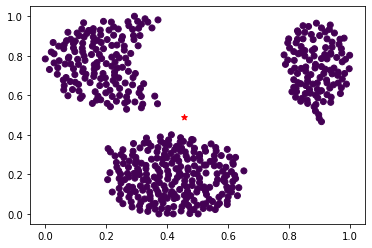


 
 DISTORTION = 44.75114050985324 Clusters= 2


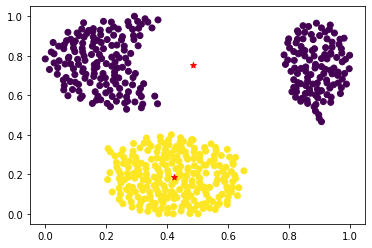


 
 DISTORTION = 11.409540670464862 Clusters= 3


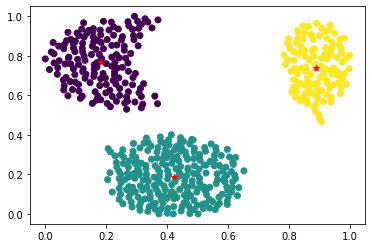


 
 DISTORTION = 10.187592913476674 Clusters= 4


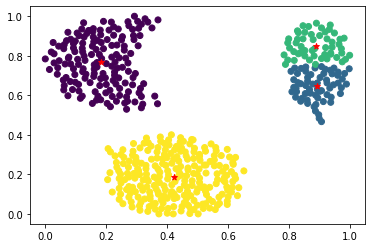


 
 DISTORTION = 8.344567886678762 Clusters= 5


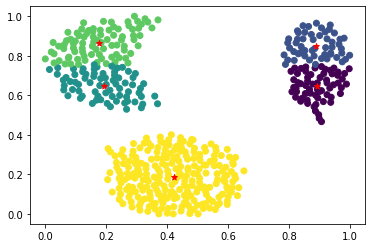


 
 DISTORTION = 6.135233453781966 Clusters= 6


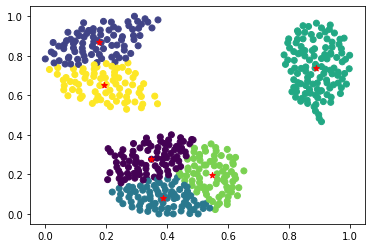


 
 DISTORTION = 5.499939317252576 Clusters= 7


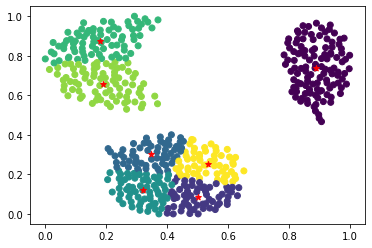


 
 DISTORTION = 4.652042403690667 Clusters= 8


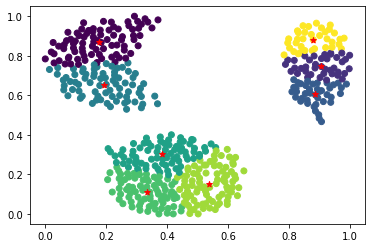


 
 DISTORTION = 4.055139278170419 Clusters= 9


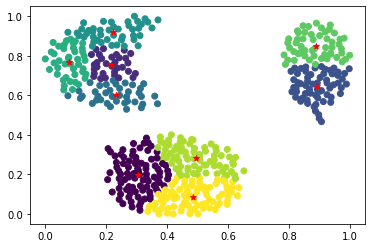


 
 DISTORTION = 3.6852230870268277 Clusters= 10


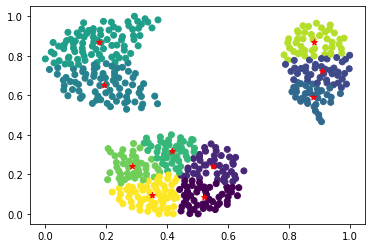


 
 Distortion


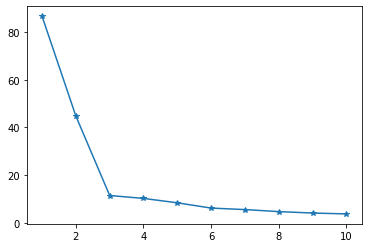

Root Mean Squared Standard Deviation


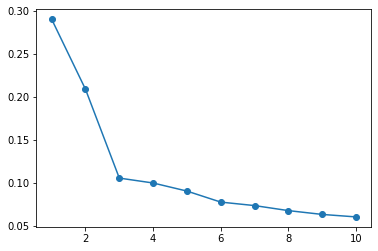

In [35]:
def elbow_method(k_max, x_n_train , y_n_train ):
    list_distortions = []
    list_rmmstds = []
    for k in range(1,k_max+1):
        centroide_x , centroide_y , matriz_clusters , distortion = kmeans(k,x_n_train,y_n_train)
        rmmstd = RMSSTD(x_n_train,y_n_train,centroide_x,centroide_y, matriz_clusters, k)
        list_distortions.append(distortion)
        list_rmmstds.append(rmmstd)
    
    print("\n \n Distortion")
    plt.plot(range(1,k_max+1),list_distortions,marker="*")
    plt.show()

    print("Root Mean Squared Standard Deviation")
    plt.plot(range(1,k_max+1),list_rmmstds,marker="o")
    plt.show()


# Execute with until 10 Clusters 
elbow_method(10,x_n_train,y_n_train)

Observing the last graphic ( Elbow Method ), Disttortion and RMSSD.
We choose **k=3**


 
 DISTORTION = 11.409540670464862 Clusters= 3


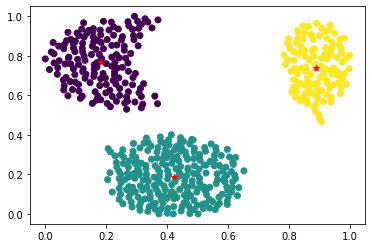

ERROR TRAIN: 0.105556286222095


In [36]:
# k = 3 
centroide_x , centroide_y , matriz_clusters , distortion = kmeans(3,x_n_train,y_n_train)
rmmstd = RMSSTD(x_n_train,y_n_train,centroide_x,centroide_y, matriz_clusters, 3)
print( "ERROR TRAIN:", rmmstd )

### Dataset Test 

In [37]:
def get_clusters(x,y,centroide_x,centroide_y,k):
    matriz_distancias = np.zeros((len(x),k))
    for k_i in range(k):
        # Euclidean distance
        x_h=(x-centroide_x[k_i])**2
        y_h=(y-centroide_y[k_i])**2
        dist= np.sqrt(x_h+y_h)
        matriz_distancias[:,k_i]=dist

    # Find the minimum distance. Creation of mask matrix
    min=np.argmin(matriz_distancias,axis=1)
    matriz_clusters=np.zeros(matriz_distancias.shape)
    i=0
    for min_i in min:
        matriz_clusters[i][min_i]=1
        i+=1
    return matriz_clusters


In [38]:
matriz_clusters_test = get_clusters(x_n_test,y_n_test,centroide_x,centroide_y,3)
rmmstd = RMSSTD(x_n_test,y_n_test,centroide_x,centroide_y, matriz_clusters_test , 3)
print( "ERROR TEST:", rmmstd )

ERROR TEST: 0.11054910998446647


## 4.5 DBSCAN Clustering



 
Borders and Core Points


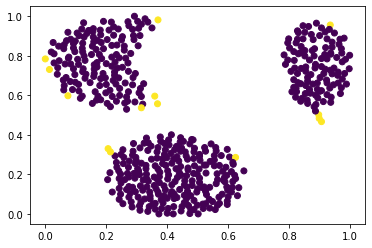

Final Clusters formed


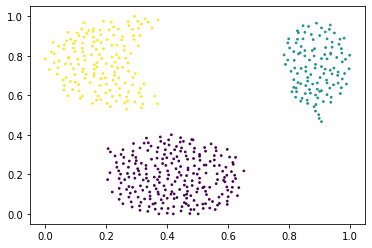

ERROR TRAIN: 0.105556286222095


In [39]:
centroide_x , centroide_y , matriz_clusters , k  = dbscan(x_n_train, y_n_train, 0.07 , 9 )
rmmstd_train = RMSSTD(x_n_train,y_n_train,centroide_x,centroide_y, matriz_clusters, k)


print( "ERROR TRAIN:", rmmstd_train )

### Dataset Test 

In [40]:
matriz_clusters_test = get_clusters(x_n_test,y_n_test,centroide_x,centroide_y,k)
rmmstd = RMSSTD(x_n_test,y_n_test,centroide_x,centroide_y, matriz_clusters_test ,k)
print( "ERROR TEST:", rmmstd )

ERROR TEST: 0.11054910998442992


Comparing both RMSSTD's methods 


|       | Kmeans | DBSCAN |
|-------|--------|--------|
| Train | 0.1067 | 0.1064 |
| Test  |   0.1110     | 0.1068       |

We can conclude that DBSCAN, is lightly superior to kmeans in this scenario.


# 5. Dataset: Vehicles Silohuetes

The features were extracted from the silhouettes by the HIPS (Hierarchical Image Processing System) extension BINATTS, which extracts a combination of scale independent features utilising both classical moments based measures such as scaled variance, skewness and kurtosis about the major/minor axes and heuristic measures such as hollows, circularity, rectangularity and compactness.

ATTRIBUTES
- COMPACTNESS	(average perim)**2/area
- CIRCULARITY	(average radius)**2/area
- DISTANCE CIRCULARITY	area/(av.distance from border)**2
- RADIUS RATIO	(max.rad-min.rad)/av.radius
- PR.AXIS ASPECT RATIO	(minor axis)/(major axis)
- MAX.LENGTH ASPECT RATIO	(length perp. max length)/(max length)
- SCATTER RATIO	(inertia about minor axis)/(inertia about major axis)
- ELONGATEDNESS		area/(shrink width)**2
- PR.AXIS RECTANGULARITY	area/(pr.axis length*pr.axis width)
- MAX.LENGTH RECTANGULARITY area/(max.length*length perp. to this)
- SCALED VARIANCE 	(2nd order moment about minor axis)/area
	ALONG MAJOR AXIS
- SCALED VARIANCE 	(2nd order moment about major axis)/area
	ALONG MINOR AXIS 
- SCALED RADIUS OF GYRATION	(mavar+mivar)/area
- SKEWNESS ABOUT 	(3rd order moment about major axis)/sigma_min**3
	MAJOR AXIS
- SKEWNESS ABOUT 	(3rd order moment about minor axis)/sigma_maj**3
	MINOR AXIS
- KURTOSIS ABOUT 	(4th order moment about major axis)/sigma_min**4
	MINOR AXIS  
- KURTOSIS ABOUT 	(4th order moment about minor axis)/sigma_maj**4
	MAJOR AXIS
- HOLLOWS RATIO	(area of hollows)/(area of bounding polygon)

### Features
- Number of atributes: 18
- Number of samples: 946


In [41]:
d = pd.read_table("merge-data",delimiter=" ",header=None)

# Clean data 
del d[19] 
datos = pd.DataFrame(d).dropna()
datos = datos.to_numpy()
print("Filas, columnas",datos.shape)

colores = datos[ : , 18 ]
datos = datos[ : , : 18 ]

Filas, columnas (846, 19)


## 5.2 Pre-processing ( Dimensionality Reduction )

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
datos_pca = pca.fit_transform( datos  )

## 5.2 Split Dataset Train/Test 

In [43]:
# Shuffe data
np.random.shuffle(datos_pca)


## 5.3 Pre-processing ( Normalization )


In [44]:
datos_train = datos_pca[:int(0.9*len(datos))]
datos_test = datos_pca[int(0.9*len(datos)):]

x_train = datos_train[:,0]
y_train = datos_train[:,1]

x_test = datos_test[:,0]
y_test = datos_test[:,1]

x_max_train = x_train.max()
x_min_train= x_train.min()
y_max_train = y_train.max()
y_min_train = y_train.min()

x_max_test = x_test.max()
x_min_test = x_test.min()
y_max_test = y_test.max()
y_min_test = y_test.min()

x_n_train, y_n_train = norm(x_train,y_train,x_max_train,x_min_train,y_max_train,y_min_train)
x_n_test, y_n_test = norm(x_test,y_test,x_max_test,x_min_test,y_max_test,y_min_test)

## 5.4 KMEANS 
Choose the best k 


 
 DISTORTION = 43.80125373964155 Clusters= 1


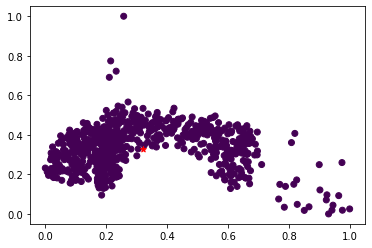


 
 DISTORTION = 16.358569689595072 Clusters= 2


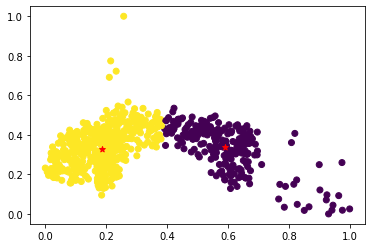


 
 DISTORTION = 10.845633743844605 Clusters= 3


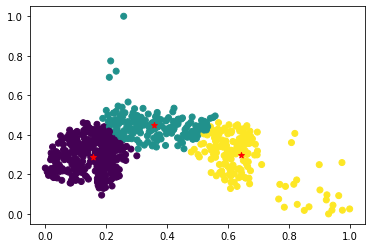


 
 DISTORTION = 8.237953370312912 Clusters= 4


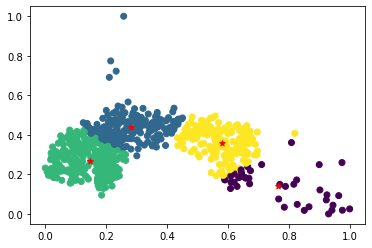


 
 DISTORTION = 10.282002683054593 Clusters= 5


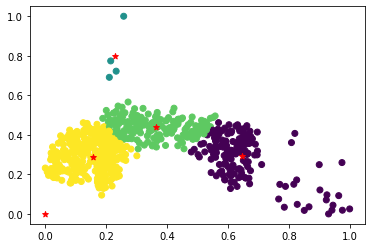


 
 DISTORTION = 7.607191749595288 Clusters= 6


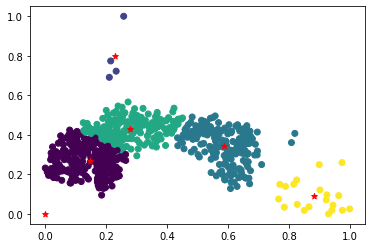


 
 DISTORTION = 6.659816950594861 Clusters= 7


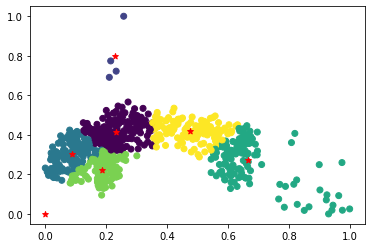


 
 DISTORTION = 4.06966190469816 Clusters= 8


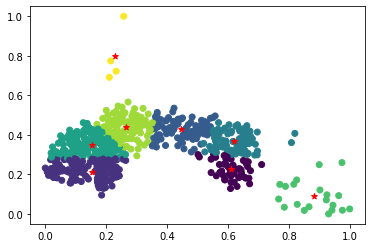


 
 DISTORTION = 6.305375249925115 Clusters= 9


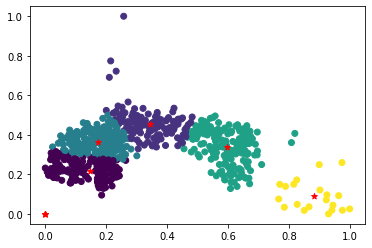


 
 DISTORTION = 4.0688990350851215 Clusters= 10


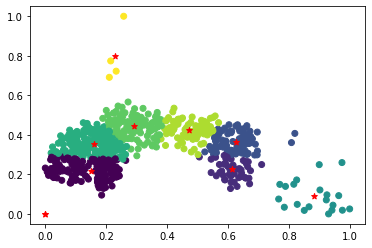


 
 Distortion


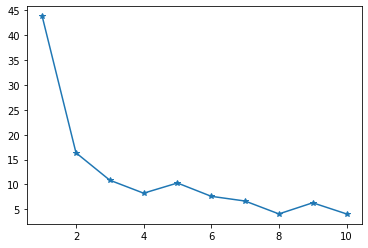

Root Mean Squared Standard Deviation


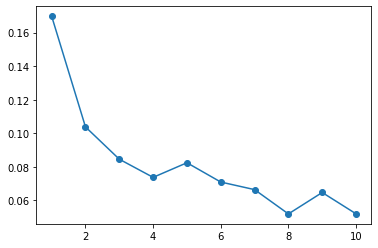

In [45]:
elbow_method(10,x_n_train,y_n_train)

By observation we could choose $k=3$ 


 
 DISTORTION = 10.841873486444072 Clusters= 3


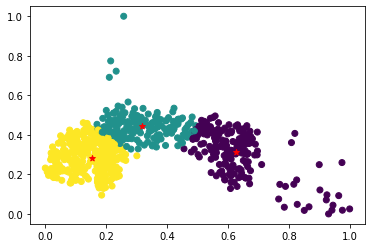

ERROR TRAIN: 0.08456731985444592


In [46]:
# k = 3 
centroide_x , centroide_y , matriz_clusters , distortion = kmeans(3,x_n_train,y_n_train)
rmmstd = RMSSTD(x_n_train,y_n_train,centroide_x,centroide_y, matriz_clusters, 3)
print( "ERROR TRAIN:", rmmstd )

### Dataset Test 

In [47]:
matriz_clusters_test = get_clusters(x_n_test,y_n_test,centroide_x,centroide_y,3)
rmmstd = RMSSTD(x_n_test,y_n_test,centroide_x,centroide_y, matriz_clusters_test , 3)
print( "ERROR TEST:", rmmstd )

ERROR TEST: 0.10584282994911683


## 5.5 DBSCAN



 
Borders and Core Points


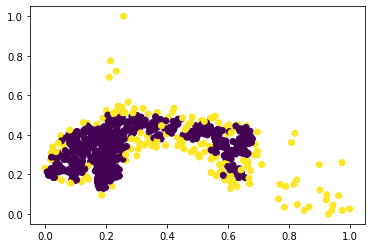

Final Clusters formed


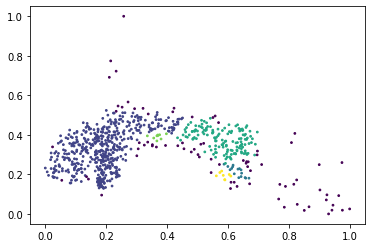

ERROR TRAIN: 0.11051557578763083


In [48]:
centroide_x , centroide_y , matriz_clusters , k  = dbscan(x_n_train, y_n_train, 0.026 , 6 )
rmmstd_train = RMSSTD(x_n_train,y_n_train,centroide_x,centroide_y, matriz_clusters, k)


print( "ERROR TRAIN:", rmmstd_train )

### Dataset Test

In [49]:
matriz_clusters_test = get_clusters(x_n_test,y_n_test,centroide_x,centroide_y,k)
rmmstd = RMSSTD(x_n_test,y_n_test,centroide_x,centroide_y, matriz_clusters_test ,k)
print( "ERROR TEST:", rmmstd )

ERROR TEST: 0.11339800029161819


Comparing both RMSSTD's methods 


|       | Kmeans | DBSCAN |
|-------|--------|--------|
| Train | 0.0803 | 0.1031 |
| Test  |   0.1316     | 0.1417       |

In this case, Kmeans is superior. But it doesn't mean, the clusters are better. It could be intrepreted in several ways. 

### Contributions

Luis Bernal:
- KMeans Implementation
- DBScan
- Plotting

Jarol Butron
- Error Metrics
- Elbow method
- PCA Dims. Reduction


## 6. Bibliography
- Turing Institute Research Memorandum TIRM-87-018 "Vehicle Recognition Using Rule Based Methods" by Siebert,JP (March 1987)